# Tarea 2

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
import sympy as sym 
import random as rand
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import qexpy as q
from scipy import integrate

## 1.

In [137]:
def fc(z):
    return 1j*z

In [138]:
def ComplexEuler3():
    global theta
    global h_
    global f
    
    theta += h_
    
    k1 = fc(f)
    k2 = fc(f+0.5*h_*k1)
    k3 = fc(f-h_*k1+2*h_*k2)
    
    f += (1/6)*h_*(k1+4*k2+k3)

In [139]:
theta = 0.

N = 20
Vueltas = 1

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion3 = np.array([theta,f])

for i in range(N):
    ComplexEuler3()
    Solucion3 = np.vstack([Solucion3, np.array([theta,f])])


In [140]:
def ComplexEuler4():
    global theta
    global h_
    global f
    
    theta += h_
    
    k1 = fc(f)
    k2 = fc(f+0.5*h_*k1)
    k3 = fc(f+0.5*h_*k2)
    k4 = fc(f+k3*h_)
    
    f += (1/6)*h_*(k1+2*k2+2*k3+k4)

In [141]:
theta = 0.

N = 20
Vueltas = 1

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion4 = np.array([theta,f])

for i in range(N):
    ComplexEuler4()
    Solucion4 = np.vstack([Solucion4, np.array([theta,f])])


<IPython.core.display.Javascript object>


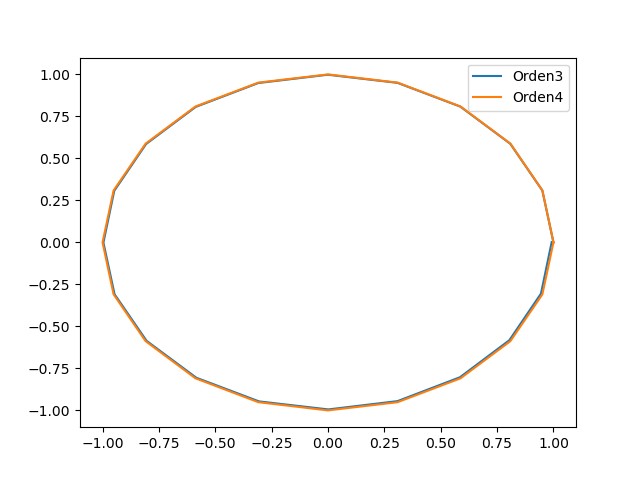

In [142]:

Re3 = np.real(Solucion3[:,1])
Im3 = np.imag(Solucion3[:,1])

Re4 = np.real(Solucion4[:,1])
Im4 = np.imag(Solucion4[:,1])

plt.plot(Re3,Im3,label="Orden3")
plt.plot(Re4,Im4,label="Orden4")
plt.legend()

Como se evidencia en la gráfica anterior, los algoritmos de Runge-Kutta de tercer y cuerto orden se aproximan bastante a la gráfica original.

## 2.

##### a) 
Muestre que el error del método está dado por:

$$
\epsilon_{n+1}-(2+h^2a'_n)\epsilon_n + \epsilon_{n-1}=0\\
$$
donde
$$
a'_n=\frac{\partial a}{\partial x}
$$


### Solución:

Dado que el método de Verlet parte de $x_{n+1}=2x_n-x_{n-1}+h^2a_n+ \mathscr{O}(h^4)$ se puede definir $x_n=\bar x_n +\epsilon_n$. Se puede reemplazar esta última en la expresión original de Verlet de modo que se obtendría:


$$
\begin{align*}
\bar x_{n+1} +\epsilon_{n+1} &=2(\bar x_n +\epsilon_n)-(\bar x_{n-1} +\epsilon_{n-1}) +h^2a_n+\mathscr{O}(h^4)\\
\bar x_{n+1} +\epsilon_{n+1}&=2\bar x_n +2\epsilon_n-\bar x_{n-1}-\epsilon_{n-1}+h^2a_n+\mathscr{O}(h^4)\\
\bar x_{n+1} +\epsilon_{n+1}&=2\bar x_n +2\epsilon_n-\bar x_{n-1}-\epsilon_{n-1}+h^2(a(\bar x_n)+\epsilon_n a'_n)+\mathscr{O}(h^4)\\
\bar x_{n+1} +\epsilon_{n+1}&=2\bar x_n+(2+h^2a'_n)\epsilon_n-\bar x_{n-1}-\epsilon_{n-1}+h^2a(\bar x_n)+\mathscr{O}(h^4)\\
\epsilon_{n+1}-(2+h^2a'_n)\epsilon_n+\epsilon_{n-1}&=- \bar x_{n+1}+2\bar x_n-\bar x_{n-1}+h^2a(\bar x_n)\\
\epsilon_{n+1}-(2+h^2a'_n)\epsilon_n+\epsilon_{n-1}&=h^2a(\bar x_n) +\mathscr{O}(h^4)
\end{align*}
$$

Y, sabiendo que $-h^2a(\bar x_n) =\mathscr{O}(h^4)$, te tendría: que,

$$
\epsilon_{n+1}-(2+h^2a'_n)\epsilon_n+\epsilon_{n-1}=0
$$

##### b)

Para el caso de un oscilador armónico clásico muestre que:

$$
\epsilon_{n+1}-2(1-R)\epsilon_n + \epsilon_{n-1}=0
$$

donde 

$$
2R=h^2\omega^2
$$

### Solución:




##### c)

##### d)

##### e)

## 3.

Ecuación diferencial de Riccati:

$$
x^3y'=x^4y^2-2x^2y-1
$$

Inicialmente se despeja $y'$, de modo que se tendría:
$$
\begin{align*}
y'&=xy^2-\frac{2y}{x}-\frac{1}{x^3}\\
\end{align*}
$$

Dado que es una ecuación de Riccatti, es necesario realizar un cambio de variable usando $y=y_1 +u^{-1}$ y dado que, según el enunciado $y_1=x^{-2}$, se puede reescribir como una ecuación diferencial lineal.

$$
y=x^{-2} +u^{-1}
$$

$$
y'=-2x^{-3} -u^{-2}u'
$$

Sustituyendo en la ED:
$$
\begin{align*}
-2x^{-3} -u^{-2}u'&=x(x^{-2} +u^{-1})^2-\frac{2(x^{-2} +u^{-1})}{x}-\frac{1}{x^3}\\
-2x^{-3} -u^{-2}u'&=x(x^{-4}+2x^{-2}u^{-1}+u^{-2})-\frac{2x^{-2}+2u^{-1}}{x}-\frac{1}{x^3}\\
-2x^{-3} -u^{-2}u'&=x^{-3}+2x^{-1}u^{-1}+xu^{-2}-\frac{2x^{-2}+2u^{-1}}{x}-\frac{1}{x^3}\\
-x^{-3} -u^{-2}u'&=x^{-3}+2x^{-1}u^{-1}+xu^{-2}-\frac{2x^{-2}+2u^{-1}}{x}\\
-2x^{-3} -u^{-2}u'&=xu^{-2}-2x^{-3}\\
 -u^{-2}u'&=xu^{-2}\\
 x=-u'
\end{align*}
$$

Entonces, a partir de u' se puede hallar u'

$$
\begin{align*}
u&=\int -x dx\\
&=\frac{-x^2}{2} +C
\end{align*}
$$

De modo que al reemplazar u, se tendría:
$$
\begin{align*}
y&=y_1 +u^{-1}\\
&=x^{-2} +\Big(\frac{-x^2}{2} +C \Big)^{-1}
\end{align*}
$$

Además por condiciones iniciales se tendría que:
$$
\begin{align*}
y(\sqrt{2})=0 &=\sqrt{2}^{-2} +\Big(\frac{-\sqrt{2}^2}{2} +C \Big)^{-1}\\
0&=2^{-1}+(-1+C)^{-1}\\
-(C-1)&=(0.5)^{-1}\\
C&=-2+1\\
C&=-1
\end{align*}
$$

Entonces la expresión final de y sería:
$$
\begin{align*}
&=x^{-2} -\Big(\frac{x^2}{2} +1 \Big)^{-1}
\end{align*}
$$

In [3]:
def f(x,y):
    return x*y**2-2*y*x**(-1)-1/x**3

In [21]:
N = 100
t = np.linspace(np.sqrt(2),10,N)
h = t[1] - t[0]


In [22]:
def GetEuler4(x,y,h):
    
    for i in range(1,len(x)):
        
        
        k1 = f(x[i-1],y[i-1])
        k2 = f(x[i-1]+(1/2)*h,y[i-1] + (1/2)*h*k1)
        k3 = f(x[i-1]+(1/2)*h,y[i-1] + (1/2)*h*k2)
        k4 = f(x[i-1]+h,y[i-1]+h*k3)
        
        y[i] = y[i-1] + (1/6)*h*(k1+2*k2+2*k3+k4)

In [23]:
y4 = np.zeros_like(t)
y4[0] = 0.
GetEuler4(t,y4,h)

In [24]:
def Solucion(x):
    return x**(-2)-(x**2/2 +1)**(-1)

sol=Solucion(t)

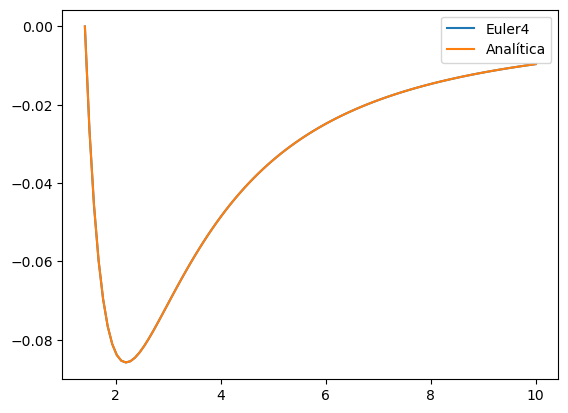

In [28]:
plt.plot(t,y4,label="Euler4")
plt.plot(t,sol,label="Analítica")
plt.legend()

4.

Resolver analíticamente la ecuación diferencial no lineal:

$$
\frac{du}{dt}=u^q , t\in [0,10]
$$

La solución exacta es: $u(t)=e^t$ para q=1 y $u(t)=(t(1-q)+1)^{\frac{1}{1-q}}$ para $q<1$ y $t(1-q)+1>0$.

### Solución:

#### Para q=1:

Se tendría la siguiente ecuación diferencial:

$$
\frac{du}{dt}=u
$$

De modo que al resolverla se tendría,

$$
\begin{align*}
\frac{du}{dt}&=u\\
u^{-1} du&=dt\\
ln(u)&=t\\
u(t)&=e^t
\end{align*}
$$

#### Para q<1:

Sabiendo que $q<1$, se puede reescribir $q$ como $-|q|$

Resolviendo el método de separación de variables se tiene que.

$$
\begin{align*}
\frac{du}{dt}&=u^{-|q|}\\
u^{|q|} du&= dt\\
\end{align*}
$$

De modo que, integrando se tendría lo siguiente:

$$
\begin{align*}
\frac{u^{|q|+1}}{|q|+1} +C&=t\\
u(t)&=\Big(\frac{t}{1+|q|}+C \Big)^{|q|+1}\\
\end{align*}
$$

Por ende regresando a que q=-|q|:

$$
u(t)= [t(1-q)+C]^{1-q}
$$

Tomando $C=1$ por condiciones iniciales, se tendría que

$$
u(t)= [t(1-q)+1]^{1-q}
$$

5.

De la analítica:

In [95]:
def u_menorq(t,q):
    return (t*(1-q)+1)**(1/(1-q))

In [96]:
t_5= np.linspace(0,10)
qs=[0.,0.2,0.4,0.7,0.9]

(0.0, 100.0)

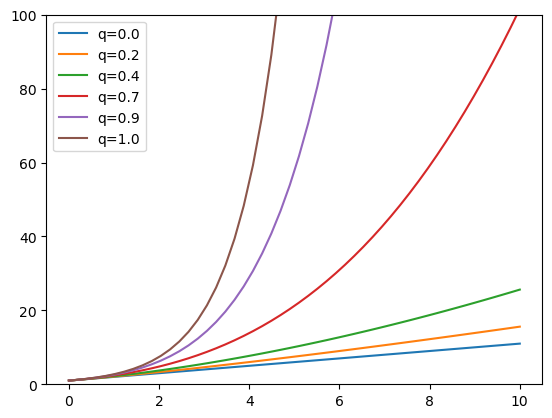

In [100]:
for i in range(len(qs)):
    plt.plot(t_5,u_menorq(t_5,qs[i]), label="q="+str(qs[i]))
    
plt.plot(t_5,np.exp(t_5),label="q=1.0")
plt.legend()
plt.ylim(0,100)

Usando RungeKutta

In [113]:
def func(u,q):
    return u**q

In [114]:
N = 100
t_5 = np.linspace(0,10,N)
h = t_5[1] - t_5[0]


In [135]:
def GetEuler4_5(x,y,h,q):
    
    for i in range(1,len(x)):
        
        k1 = func(y[i-1],q)
        k2 = func(y[i-1] + (1/2)*h*k1,q)
        k3 = func(y[i-1] + (1/2)*h*k2,q)
        k4 = func(y[i-1]+h*k3,q)
        
        y[i] = y[i-1] + (1/6)*h*(k1+2*k2+2*k3+k4)

In [141]:

qs1=[0.,0.2,0.4,0.7,0.9,1.]

(0.0, 100.0)

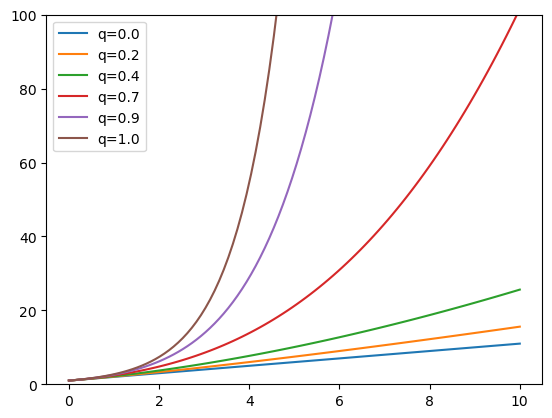

In [143]:
for i in range(len(qs1)):
    y5 = np.zeros_like(t_5)
    y5[0] = 1.
    GetEuler4_5(t_5,y5,h,qs1[i])
    plt.plot(t_5,y5, label="q="+str(qs1[i]))

    
    
plt.legend()
plt.ylim(0,100)

6.